In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [7]:
import sqlite3
import pandas as pd

In [8]:
cnx = sqlite3.connect('/home/caducovas/Documents/ringer_new.db')

In [9]:
df = pd.read_sql_query("SELECT distinct Model,time FROM reconstruction_new where time > 201809000000", cnx)

In [10]:
df

,Model,time
0,N1-LSTM_AE_1024,20180914014053
1,N1-LSTM_AE_1024,20180914015925
2,N1-AE_60,20180914035641
3,N1-AE_60,20180914050243
4,N1-AE_30,20180914051347
5,N1-AE_30,20180914060515
6,N1-AE_90,20180914062355
7,N1-AE_90-AE_50-AE_30,20180914064838
8,N1-AE_256,20180914072029
9,N1-AE_512,20180914073345


In [156]:
dfAll = pd.read_sql_query("select * from reconstruction_new where id in (select id from (SELECT class,model,sort,max(id) id FROM reconstruction_new where time > 201809000000 and Class = 'All' and Model= 'N1-AE_90-AE_50-AE_30' and time = '20180914064838' group by class,model,sort))", cnx)

In [155]:
dfAll = pd.read_sql_query("SELECT class,model,sort,max(id) FROM reconstruction_new where time > 201809000000 and Class = 'All' and Model= 'N1-AE_90-AE_50-AE_30' and time = '20180914064838' group by class,model,sort", cnx)

In [157]:
dfAll

,id,Class,Model,time,Measure,sort,etBinIdx,etaBinIdx,phase,1,...,91,92,93,94,95,96,97,98,99,100
0,362,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,0,1,1,Validation,0.983889,...,0.975321,None,0.882765,0.969102,0.951332,None,0.346068,0.411507,0.453682,None
1,371,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,1,1,1,Validation,0.986277,...,0.975712,None,0.878831,0.980648,0.889053,None,0.291008,0.444537,0.236219,None
2,380,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,2,1,1,Validation,0.988175,...,0.966968,None,0.864899,0.974109,0.877120,None,0.349295,0.528231,0.196921,None
3,390,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,3,1,1,Validation,0.986317,...,0.973452,None,0.889077,0.965683,0.795232,None,0.284334,0.672964,0.389797,None
4,398,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,4,1,1,Validation,0.984523,...,0.975587,None,0.861307,0.964974,0.897104,None,0.255338,0.451249,0.401460,None
5,407,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,5,1,1,Validation,0.988965,...,0.965351,None,0.892080,0.972964,0.929078,None,0.267496,0.540549,0.517337,None
6,416,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,6,1,1,Validation,0.976001,...,0.952990,None,0.851370,0.960545,0.880782,None,0.251755,0.353231,0.360981,None
7,425,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,7,1,1,Validation,0.978745,...,0.961140,None,0.892034,0.972886,0.927540,None,0.294537,0.453482,0.374595,None
8,434,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,8,1,1,Validation,0.986855,...,0.975723,None,0.859467,0.971756,0.943258,None,0.293215,0.459131,0.362034,None
9,443,All,N1-AE_90-AE_50-AE_30,20180914064838,Normalized_MI,9,1,1,Validation,0.984825,...,0.945116,None,0.900275,0.977411,0.781765,None,0.300254,0.469246,0.246910,None


In [158]:
dfAll = pd.read_sql_query("select * from reconstruction_new where id in (select id from (SELECT class,model,sort,max(id) id FROM reconstruction_new where time > 201809000000 and Class = 'All' and Model= 'N1-AE_90-AE_50-AE_30' and time = '20180914064838' group by class,model,sort))", cnx)
dfAll=dfAll.drop(labels=['id','Class','Model','time','Measure','sort','etBinIdx','etaBinIdx','phase'],axis=1)
dfAll.fillna(value=nan, inplace=True)

dfSignal = pd.read_sql_query("select * from reconstruction_new where id in (select id from (SELECT class,model,sort,max(id) id FROM reconstruction_new where time > 201809000000 and Class = 'Signal' and Model= 'N1-AE_90-AE_50-AE_30' and time = '20180914064838' group by class,model,sort))", cnx)
dfSignal=dfSignal.drop(labels=['id','Class','Model','time','Measure','sort','etBinIdx','etaBinIdx','phase'],axis=1)
dfSignal.fillna(value=nan, inplace=True)

dfBkg = pd.read_sql_query("select * from reconstruction_new where id in (select id from (SELECT class,model,sort,max(id) id FROM reconstruction_new where time > 201809000000 and Class = 'Background' and Model= 'N1-AE_90-AE_50-AE_30' and time = '20180914064838' group by class,model,sort))", cnx)
dfBkg=dfBkg.drop(labels=['id','Class','Model','time','Measure','sort','etBinIdx','etaBinIdx','phase'],axis=1)
dfBkg.fillna(value=nan, inplace=True)


In [179]:
df

,Model,time
0,N1-LSTM_AE_1024,20180914014053
1,N1-LSTM_AE_1024,20180914015925
2,N1-AE_60,20180914035641
3,N1-AE_60,20180914050243
4,N1-AE_30,20180914051347
5,N1-AE_30,20180914060515
6,N1-AE_90,20180914062355
7,N1-AE_90-AE_50-AE_30,20180914064838
8,N1-AE_256,20180914072029
9,N1-AE_512,20180914073345


In [15]:
dfAll = pd.read_sql_query("SELECT * FROM reconstruction_new where time > 201809000000 and Class = 'All' and Model= 'N1-LSTM_AE_180' and time = '20180914165217'", cnx)
dfAll=dfAll.drop(labels=['id','Class','Model','time','Measure','sort','etBinIdx','etaBinIdx','phase'],axis=1)
dfAll.fillna(value=nan, inplace=True)

dfSignal = pd.read_sql_query("SELECT * FROM reconstruction_new where time > 201809000000 and Class = 'Signal' and Model= 'N1-LSTM_AE_180' and time = '20180914165217'", cnx)
dfSignal=dfSignal.drop(labels=['id','Class','Model','time','Measure','sort','etBinIdx','etaBinIdx','phase'],axis=1)
dfSignal.fillna(value=nan, inplace=True)

dfBkg = pd.read_sql_query("SELECT * FROM reconstruction_new where time > 201809000000 and Class = 'Background' and Model= 'N1-LSTM_AE_180' and time = '20180914165217'", cnx)
dfBkg=dfBkg.drop(labels=['id','Class','Model','time','Measure','sort','etBinIdx','etaBinIdx','phase'],axis=1)
dfBkg.fillna(value=nan, inplace=True)




In [14]:
#dfAll['92'].replace(None, np.nan, inplace=True)

from numpy import nan
dfAll.fillna(value=nan, inplace=True)

In [203]:
dfAll

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,0.324136,0.379433,0.574955,0.558900,0.522988,0.476705,0.448675,0.430532,0.446276,0.388658,...,0.595509,NaN,0.493076,0.602340,0.437528,NaN,0.289695,0.376510,0.210476,NaN
1,0.327667,0.384241,0.578088,0.564337,0.517829,0.483545,0.454711,0.430023,0.440424,0.386563,...,0.528809,NaN,0.510827,0.540097,0.440058,NaN,0.234808,0.266858,0.369484,NaN
2,0.332106,0.394046,0.581606,0.574353,0.518148,0.482201,0.458862,0.432568,0.447957,0.394169,...,0.575421,NaN,0.489718,0.596311,0.562748,NaN,0.248622,0.453023,0.443286,NaN
3,0.328814,0.390821,0.571900,0.571992,0.521492,0.493156,0.451428,0.413105,0.433733,0.415879,...,0.595692,NaN,0.555242,0.666686,0.504668,NaN,0.253445,0.409902,0.467651,NaN
4,0.338471,0.379651,0.579142,0.568534,0.513883,0.424311,0.453027,0.375573,0.447636,0.420341,...,0.610111,NaN,0.543241,0.650737,0.468879,NaN,0.299061,0.552537,0.489279,NaN
5,0.326295,0.398866,0.579455,0.568675,0.524160,0.485874,0.447482,0.436942,0.432013,0.420803,...,0.538802,NaN,0.531841,0.625883,0.531271,NaN,0.225999,0.284726,0.462320,NaN
6,0.333665,0.385344,0.569743,0.557215,0.519128,0.447943,0.461033,0.433636,0.431535,0.399447,...,0.547586,NaN,0.485764,0.604845,0.413065,NaN,0.193090,0.205938,0.311440,NaN
7,0.333988,0.390715,0.581907,0.568588,0.527552,0.474962,0.403665,0.365554,0.457472,0.418870,...,0.557150,NaN,0.510712,0.611332,0.517459,NaN,0.237038,0.310521,0.424460,NaN
8,0.327516,0.384142,0.577023,0.563982,0.522681,0.471785,0.449990,0.429347,0.428171,0.406679,...,0.555810,NaN,0.518938,0.618480,0.427710,NaN,0.303955,0.343293,0.422222,NaN
9,0.330136,0.390514,0.575463,0.567060,0.524150,0.458440,0.462200,0.401105,0.449053,0.410419,...,0.535422,NaN,0.532909,0.579979,0.582698,NaN,0.313931,0.355263,0.477751,NaN


In [2]:
# Load the files
#sgn_vloose = np.load('data17_13TeV.AllPeriods.sgn.VL_z0off_EGAM2.bkg.VetoVL_z0off_EGAM7.Rel21.GRL_v97.npz')
#sgn_loose  = np.load('sample_loose.npz')
#sgn_tight  = np.load('data17_13TeV.AllPeriods.sgn.probes_EGAM2.bkg.VProbes_EGAM7.Rel21.GRL_v97.npz')
#sgn_medium = np.load('data17_13TeV.AllPeriods.sgn.Medium_EGAM2.bkg.VetoVL_EGAM7.Rel21.GRL_v97.npz')

sgn_medium = np.load('/home/wsfreund/CERN-DATA/Offline/tuningData/mc16calo_lhgrid_v3/mc16a.zee.20M.jf17.20M.offline.binned.calo.wdatadrivenlh.npz')

In [200]:
def plot_mean_profil(dfSignal,dfBkg, log_scale=False, output_name=None):
    # Et and Eta indices
    #et_index  = [0, 1, 2]
    #etRange = ['[4, 7]','[7, 10]','[10, 15]']
    
    #eta_index = [0, 1, 2, 3, 4]
    #etaRange = ['[0, 0.8]','[0.8, 1.37]','[1.37, 1.54]','[1.54, 2.37]','[2.37, 2.47]']
    
    et_index  = [1,2]
    etRange = ['[20, 30]']
    
    eta_index = [1,2]
    etaRange = ['[0.6, 0.8]']
    
    for iet, etrange in zip(et_index, etRange):
        for ieta, etarange in zip(eta_index, etaRange):
            #sgn = data_file['signalPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            #bkg = data_file['backgroundPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            all=dfAll.values
            sgn=dfSignal.values
            bkg=dfBkg.values
            plt.figure(figsize=(16,10))
            plt.errorbar(np.arange(100), np.mean(all, axis=0),yerr=np.std(all, axis=0), fmt='go-',color='green')
            plt.errorbar(np.arange(100), np.mean(sgn, axis=0),yerr=np.std(sgn, axis=0), fmt='D-', color='cornflowerblue')
            plt.errorbar(np.arange(100), np.mean(bkg, axis=0),yerr=np.std(bkg, axis=0), fmt='ro-')

            plt.legend(['All','Electron', 'Background'], loc='best', fontsize='xx-large')
            for i in [7, 71, 79, 87, 91, 95]:
                plt.axvline(i, color='gray', linestyle='--', linewidth=.8)

            plt.title(r'Deep LSTM AE - 2 Layers 100X180 MI Input X Reconstruction $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            plt.xlabel('#Rings', fontsize=15)
            plt.ylabel('Normalized Mutual Information', fontsize=15)
            plt.ylim(ymax=1)
            if log_scale:
                y_position = .9#*np.max([np.mean(sgn, axis=0), np.mean(bkg, axis=0)]) + 1e3
            else:
                y_position = .98#*np.max([np.mean(sgn, axis=0), np.mean(bkg, axis=0)])

            for x,y,text in [(2,y_position,r'PS'), (8,y_position,r'EM1'),
                             (76,y_position,r'EM2'),(80,y_position,r'EM3'),
                            (88,y_position,r'HAD1'), (92,y_position,r'HAD2'), (96,y_position,r'HAD3'),]:
                plt.text(x,y,text, fontsize=15, rotation=90)
            
            plt.show()

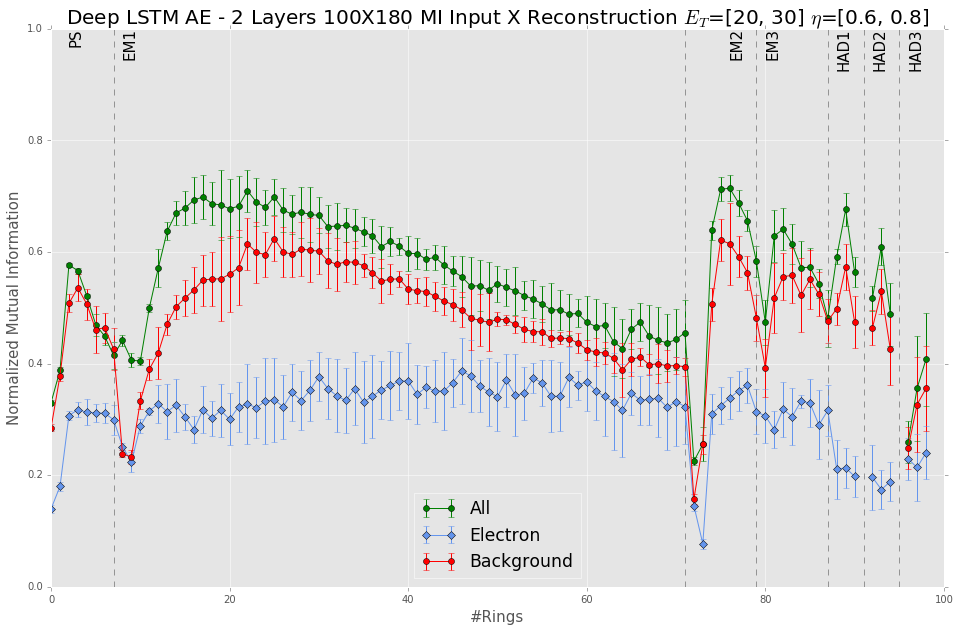

In [201]:
plot_mean_profil(dfSignal,dfBkg, log_scale=False, output_name='medium')

In [6]:
def plot_mean_profile_separed(data_file, log_scale=False, output_name=None):
    # Et and Eta indices
    #et_index  = [0, 1, 2]
    #etRange = ['[4, 7]','[7, 10]','[10, 15]']
    
    #eta_index = [0, 1, 2, 3, 4]
    #etaRange = ['[0, 0.8]','[0.8, 1.37]','[1.37, 1.54]','[1.54, 2.37]','[2.37, 2.47]']
    
    et_index  = [2,3]
    etRange = ['[30, 40]']
    
    eta_index = [0,1,2]
    etaRange = ['[0, 0.6]','[0.6, 0.8]']
    
    for iet, etrange in zip(et_index, etRange):
        for ieta, etarange in zip(eta_index, etaRange):
            sgn = data_file['signalPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            bkg = data_file['backgroundPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            
            f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(25,10))
            ax1.errorbar(np.arange(100), np.mean(sgn, axis=0),yerr=np.std(sgn, axis=0), fmt='D-', color='cornflowerblue', label='Mean Profile')
            ax1.plot(np.arange(100), np.max(sgn, axis=0), '^-', color='darkblue', label='Max Profile')
            ax1.set_title(r'Signal Profile $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            ax1.set_xlabel('#Rings', fontsize= 20)
            ax1.set_ylabel('Energy [MeV]',fontsize= 20)
            ax1.tick_params(labelsize= 15)
            ax1.legend(loc='best', fontsize='xx-large')
            
            ax2.errorbar(np.arange(100), np.mean(bkg, axis=0),yerr=np.std(bkg, axis=0), fmt='ro-',
                         label='Mean Profile')
            ax2.plot(np.arange(100), np.max(bkg, axis=0), '^-', color='darkred', label='Max Profile')
            ax2.set_title(r'Background Patterns $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            ax2.set_xlabel('#Rings', fontsize= 20)
            ax2.set_ylabel('Energy [MeV]',fontsize= 20)
            ax2.tick_params(labelsize= 15)
            ax1.legend(loc='best', fontsize='xx-large')
            #plt.legend(['Electron', 'Background'], loc='best', fontsize='xx-large')
            for i in [7, 71, 79, 87, 91, 95]:
                ax1.axvline(i, color='gray', linestyle='--', linewidth=.8)
                ax2.axvline(i, color='gray', linestyle='--', linewidth=.8)
            
            if log_scale:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.mean(bkg, axis=0)]) + 1e3
            else:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.mean(bkg, axis=0)])

            for x,y,text in [(2,y_position,r'PS'), (8,y_position,r'EM1'),
                             (76,y_position,r'EM2'),(80,y_position,r'EM3'),
                            (88,y_position,r'HAD1'), (92,y_position,r'HAD2'), (96,y_position,r'HAD3'),]:
                ax1.text(x,y,text, fontsize=15, rotation=90)
                ax2.text(x,y,text, fontsize=15, rotation=90)
            
            if log_scale:
                plt.yscale('log')
            if output_name == None:
                plt.savefig('meanProfile_et{}_eta{}.pdf'.format(iet, ieta))
            else:
                plt.savefig(output_name+'_meanProfile_et{}_eta{}.pdf'.format(iet, ieta))
            #plt.show()

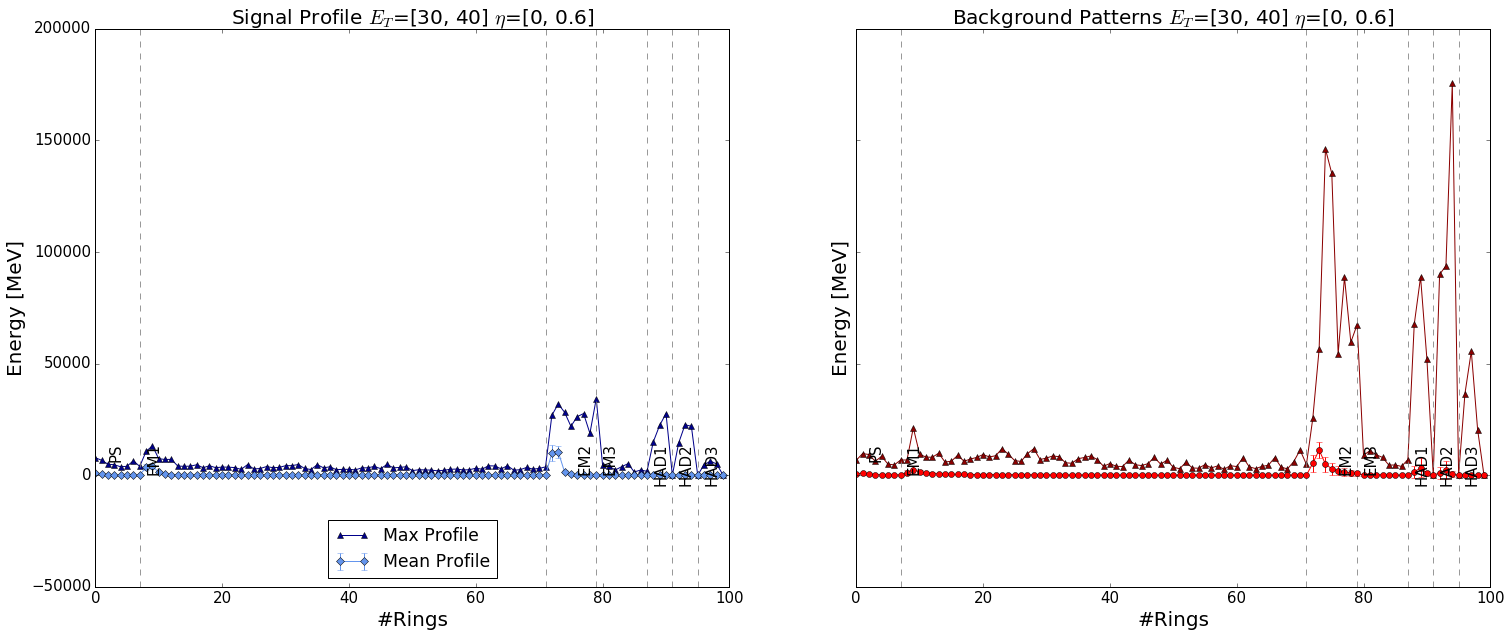

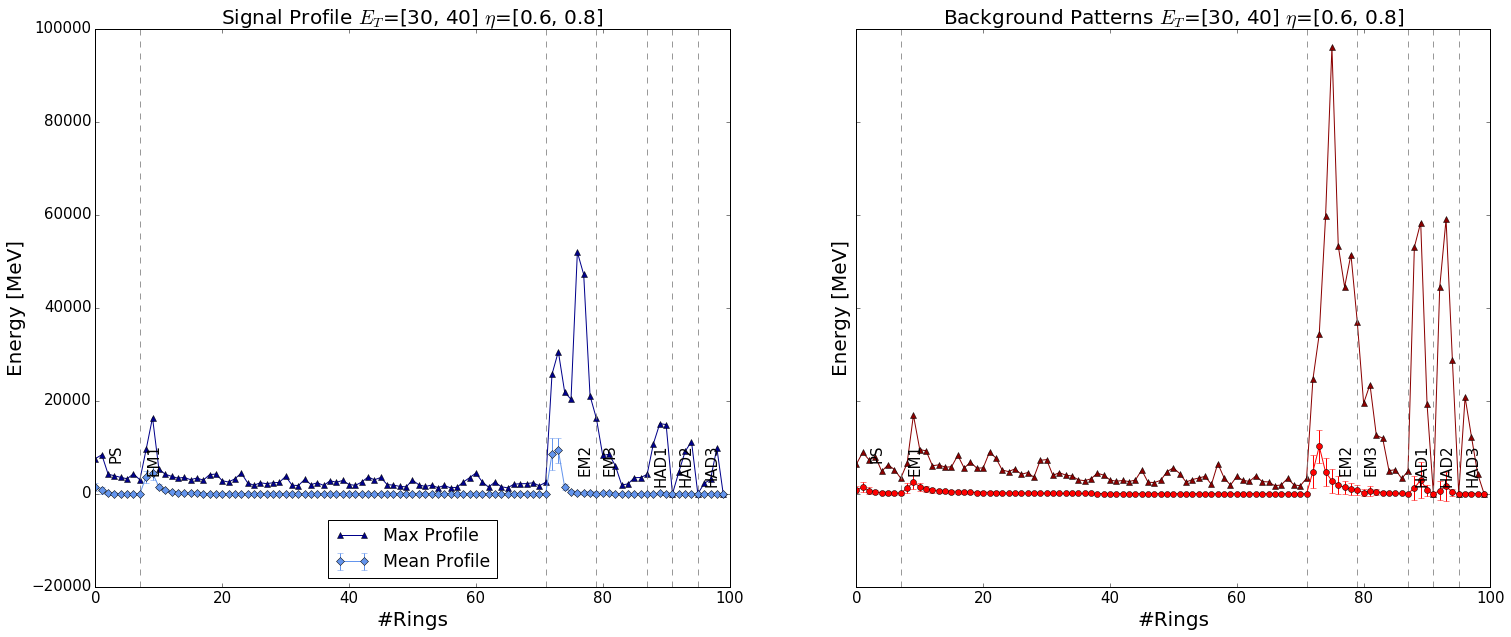

In [7]:
plot_mean_profile_separed(sgn_medium, log_scale=False, output_name='medium')

In [8]:
def plot_mean_profile_per_figure(data_file, log_scale=False, output_name=None):
    # Et and Eta indices
    #et_index  = [0, 1, 2]
    #etRange = ['[4, 7]','[7, 10]','[10, 15]']
    
    #eta_index = [0, 1, 2, 3, 4]
    #etaRange = ['[0, 0.8]','[0.8, 1.37]','[1.37, 1.54]','[1.54, 2.37]','[2.37, 2.47]']
    
    et_index  = [2,3]
    etRange = ['[30, 40]']
    
    eta_index = [0,1,2]
    etaRange = ['[0, 0.6]','[0.6, 0.8]']
    
    for iet, etrange in zip(et_index, etRange):
        for ieta, etarange in zip(eta_index, etaRange):
            sgn = data_file['signalPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            bkg = data_file['backgroundPatterns_etBin_%i_etaBin_%i' %(iet, ieta)]
            
            plt.figure(figsize=(16,10))
            plt.errorbar(np.arange(100), np.mean(sgn, axis=0),yerr=np.std(sgn, axis=0), fmt='D-', color='b',
                         label='Mean Profile')
            plt.plot(np.arange(100), np.max(sgn, axis=0), '^-', color='darkblue', label='Max Profile')
            plt.plot(np.arange(100), np.min(sgn, axis=0), 'v-', color='cornflowerblue', label='Min Profile')
            #plt.errorbar(np.arange(100), np.mean(bkg, axis=0),yerr=np.std(bkg, axis=0), fmt='ro-')
            plt.legend(loc='best', fontsize='xx-large')
            for i in [7, 71, 79, 87, 91, 95]:
                plt.axvline(i, color='gray', linestyle='--', linewidth=.8)

            plt.title(r'Mean Energy Profile $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            plt.xlabel('#Rings', fontsize=15)
            plt.ylabel('Energy [MeV]', fontsize=15)
            
            if log_scale:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.min(sng, axis=0), np.max(sgn, axis=0)]) + 1e3
            else:
                y_position = .8*np.max([np.mean(sgn, axis=0), np.mean(sgn, axis=0), np.max(sgn, axis=0)])

            for x,y,text in [(2,y_position,r'PS'), (8,y_position,r'EM1'),
                             (76,y_position,r'EM2'),(80,y_position,r'EM3'),
                            (88,y_position,r'HAD1'), (92,y_position,r'HAD2'), (96,y_position,r'HAD3'),]:
                plt.text(x,y,text, fontsize=15, rotation=90)
            
            if log_scale:
                plt.yscale('log')
            if output_name == None:
                plt.savefig('Profile_sgn_et{}_eta{}.pdf'.format(iet, ieta))
            else:
                plt.savefig(output_name+'Profile_sgn_et{}_eta{}.pdf'.format(iet, ieta))
            plt.close()
            
            # Bkg profiles
            plt.figure(figsize=(16,10))
            plt.errorbar(np.arange(100), np.mean(bkg, axis=0),yerr=np.std(bkg, axis=0), fmt='D-', color='r',
                         label='Mean Profile')
            plt.plot(np.arange(100), np.max(bkg, axis=0), '^-', color='darkred', label='Max Profile')
            plt.plot(np.arange(100), np.min(bkg, axis=0), 'v-', color='tomato', label='Min Profile')
            plt.legend(loc='best', fontsize='xx-large')
            for i in [7, 71, 79, 87, 91, 95]:
                plt.axvline(i, color='gray', linestyle='--', linewidth=.8)

            plt.title(r'Mean Energy Profile $E_T$={} $\eta$={}'.format(etrange,etarange),fontsize= 20)
            plt.xlabel('#Rings', fontsize=15)
            plt.ylabel('Energy [MeV]', fontsize=15)
            
            if log_scale:
                y_position = .8*np.max([np.mean(bkg, axis=0), np.min(bkg, axis=0), np.max(bkg, axis=0)]) + 1e3
            else:
                y_position = .8*np.max([np.mean(bkg, axis=0), np.mean(bkg, axis=0), np.max(bkg, axis=0)])

            for x,y,text in [(2,y_position,r'PS'), (8,y_position,r'EM1'),
                             (76,y_position,r'EM2'),(80,y_position,r'EM3'),
                            (88,y_position,r'HAD1'), (92,y_position,r'HAD2'), (96,y_position,r'HAD3'),]:
                plt.text(x,y,text, fontsize=15, rotation=90)
            
            if log_scale:
                plt.yscale('log')
            if output_name == None:
                plt.savefig('Profile_bkg_et{}_eta{}.pdf'.format(iet, ieta))
            else:
                plt.savefig(output_name+'Profile_bkg_et{}_eta{}.pdf'.format(iet, ieta))
            #plt.show()

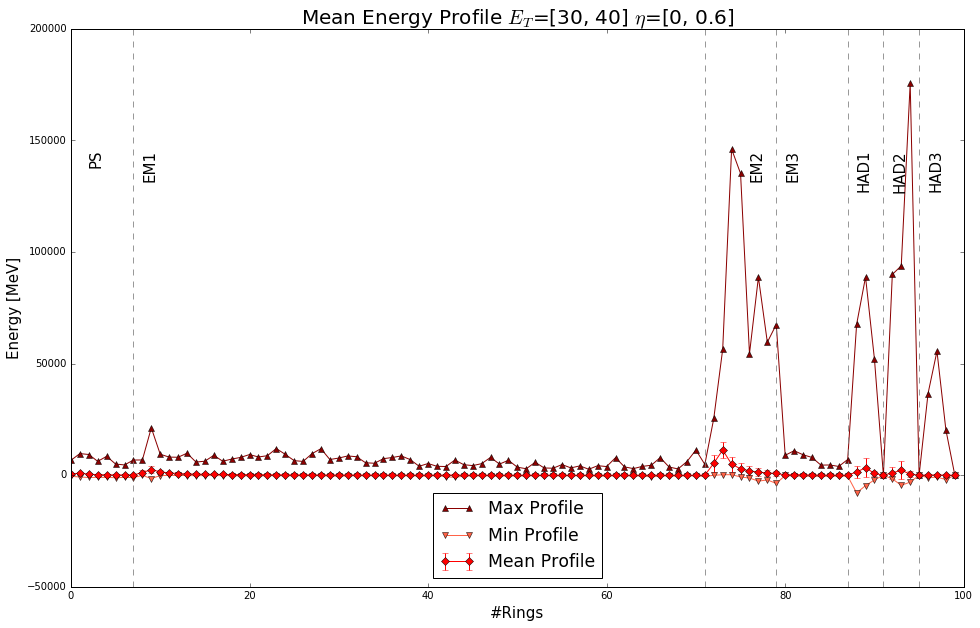

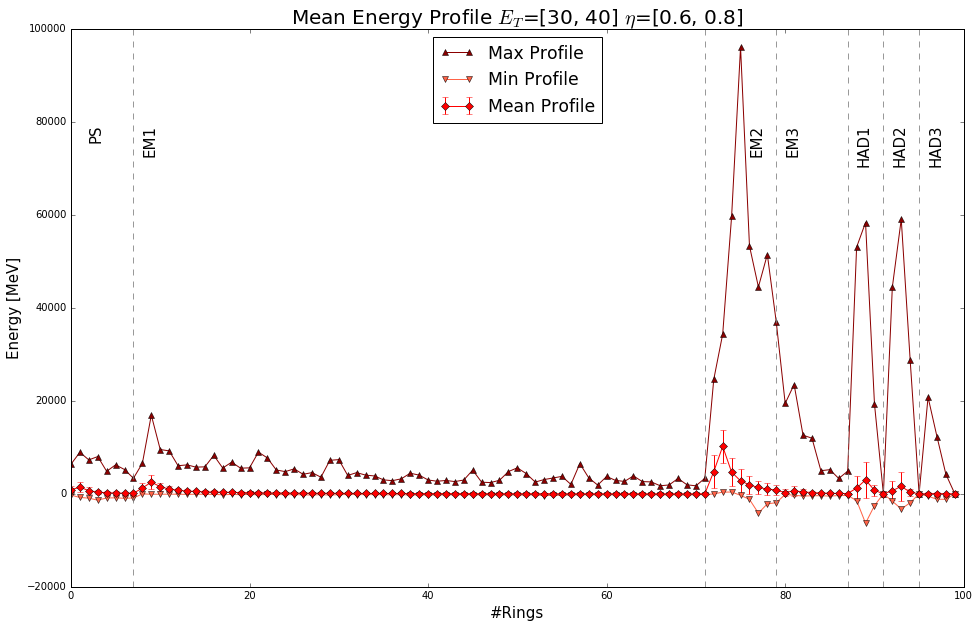

In [9]:
plot_mean_profile_per_figure(sgn_medium)

In [10]:
np.std(sgn_tight['signalPatterns_etBin_0_etaBin_0'], axis=0)

array([ 225.70175171,  294.49710083,  287.04840088,  233.62155151,
        235.26263428,  224.41751099,  204.2321167 ,  188.39251709,
        234.84609985,  274.98251343,  140.2250824 ,   80.78117371,
         65.54857635,   59.80945206,   56.30541229,   54.07242203,
         54.31510544,   54.14137268,   54.62789536,   54.42529678,
         53.96117783,   53.46917343,   53.78199005,   55.10902786,
         54.45621109,   54.92973709,   54.11561966,   54.4991951 ,
         54.60214996,   55.66257858,   55.29161072,   55.33224487,
         54.88100433,   55.3015213 ,   56.52469254,   56.70786285,
         56.14803314,   55.77177048,   55.39471054,   55.41602707,
         56.23092651,   57.18031693,   56.37686157,   56.77375412,
         55.64052582,   55.31318283,   55.16608047,   53.8953743 ,
         54.05832672,   54.2342453 ,   53.81749344,   52.90527344,
         50.81797409,   50.95729828,   50.31710815,   49.20751572,
         50.4239006 ,   49.84628296,   50.04117584,   49.54649

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import six

df = pd.DataFrame()
df['date'] = ['2016-04-01', '2016-04-02', '2016-04-03']
df['calories'] = [2200, 2100, 1500]
df['sleep hours'] = [2200, 2100, 1500]
df['gym'] = [True, False, False]


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns=0, col_width=2.0)

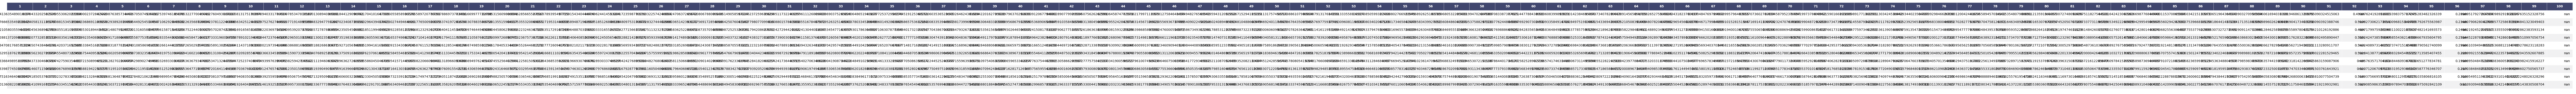

In [17]:
a=render_mpl_table(dfAll, header_columns=0, col_width=2.0)

In [20]:
fig.show()

NameError: name 'fig' is not defined

In [21]:
df_qq = pd.read_sql_query("select id,Class,Model,time,Measure,sort,etBinIdx,etaBinIdx,phase from reconstruction_new where id in (select id from (SELECT class,model,sort,max(id) id FROM reconstruction_new where time > 201809000000 and Class = 'All' and Model= 'N1-AE_90-AE_50-AE_30' and time = '20180914064838' group by class,model,sort))", cnx)


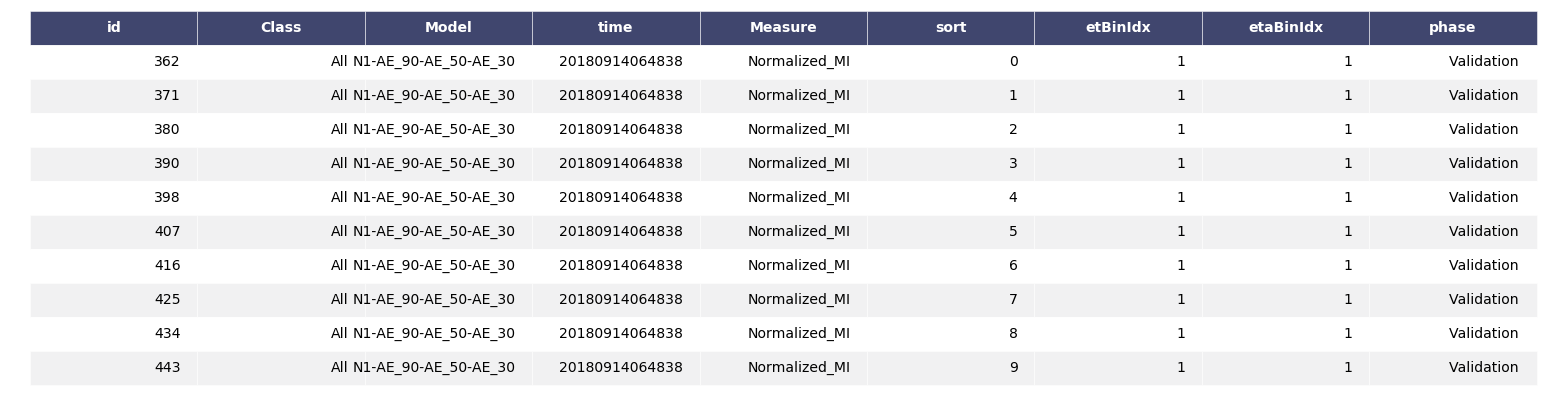

In [24]:
render_mpl_table(df_qq, header_columns=0, col_width=3.0)